<a href="https://colab.research.google.com/github/thallamsaithrishool/AIML_2303a51127/blob/main/AIML_LAB_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np


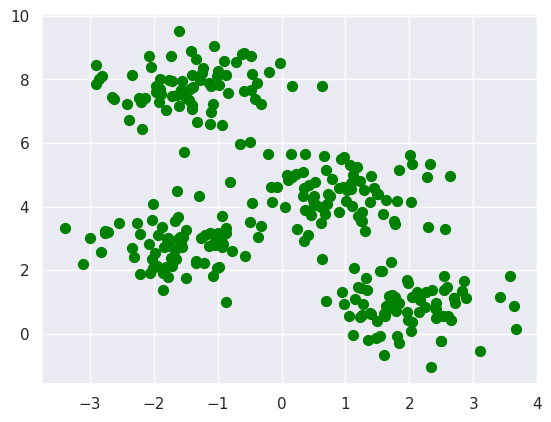

In [78]:
from sklearn.datasets import make_blobs
X,y_true=make_blobs(n_samples=300,centers=4,cluster_std=0.70,random_state=0)
plt.scatter(X[:,0],X[:,1],s=50,color='green');


In [79]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, n_init=10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

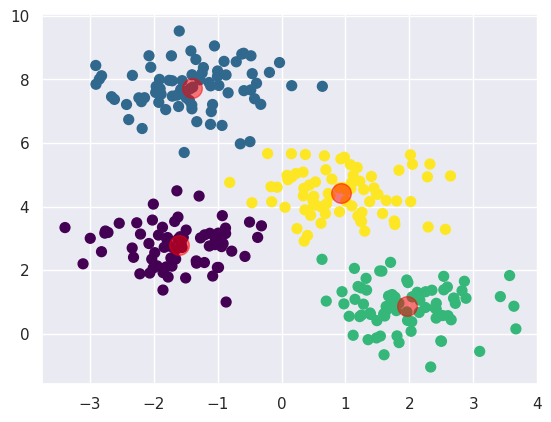

In [80]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,
            s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1],
            c='red', s=200, alpha=0.5);

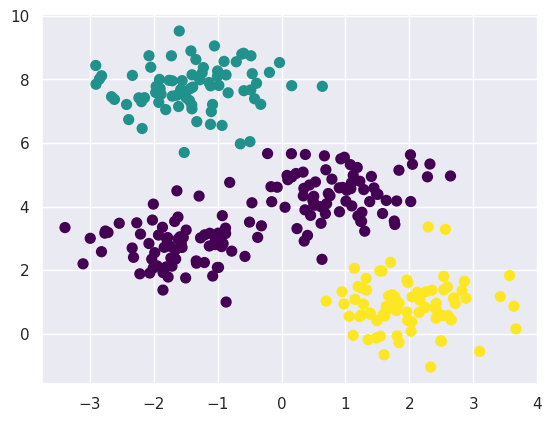

In [81]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 3)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

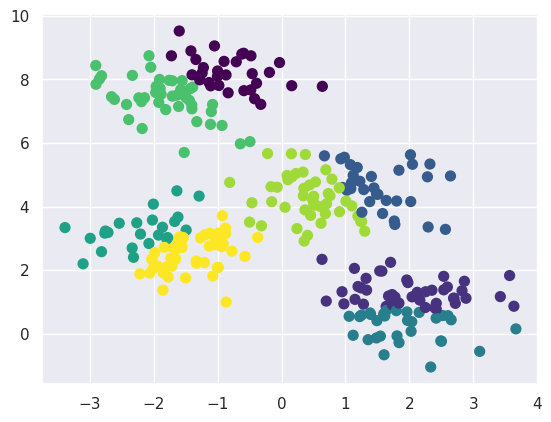

In [82]:
centers, labels = find_clusters(X, 8, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

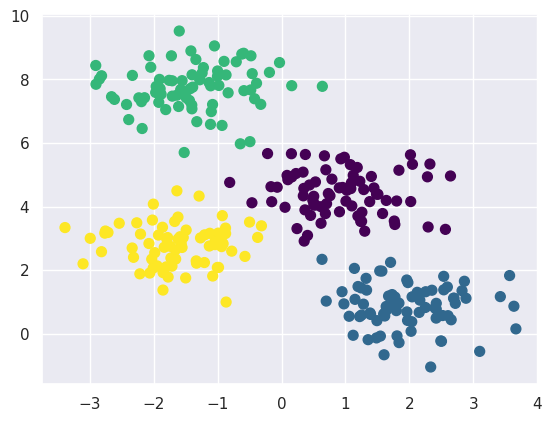

In [83]:
labels = KMeans(4, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [84]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)


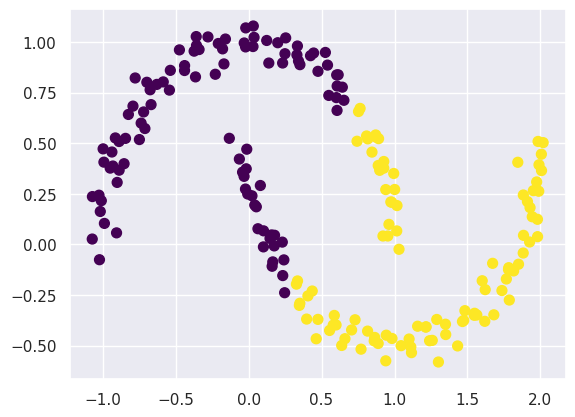

In [85]:
labels = KMeans(2, random_state=0, n_init=10).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


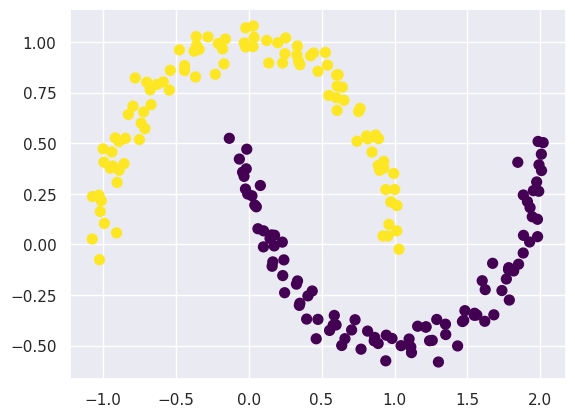

In [86]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2,
                           affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [87]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.7, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

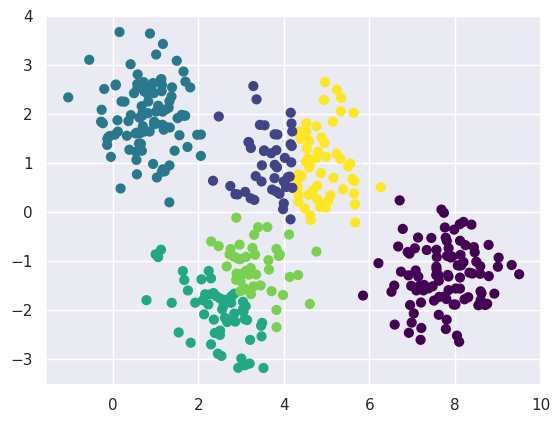

In [88]:
from sklearn.cluster import KMeans
kmeans = KMeans(6, random_state=0, n_init=10)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [89]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [90]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', edgecolor='k',zorder=2)
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

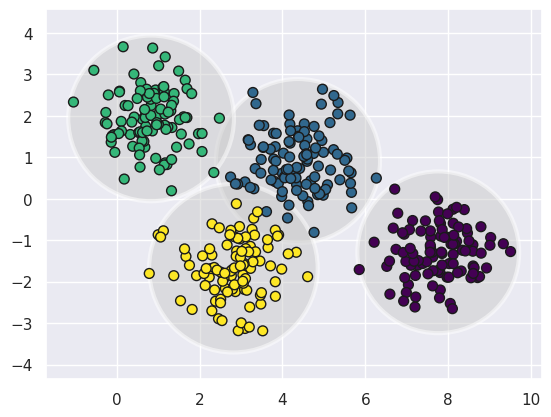

In [91]:
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
plot_kmeans(kmeans, X)

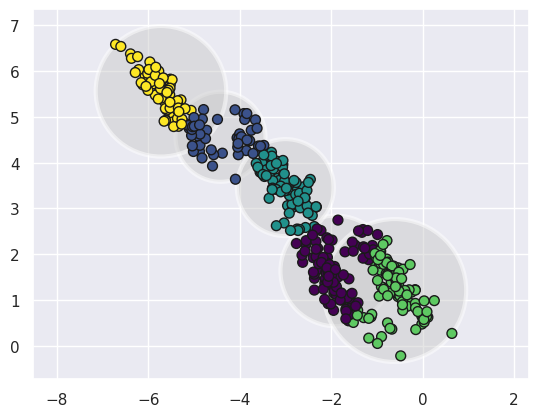

In [92]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=5, random_state=0, n_init=10)
plot_kmeans(kmeans, X_stretched)

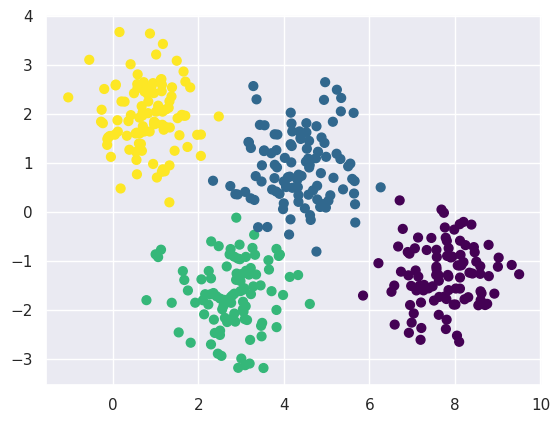

In [93]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [94]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.022 0.978 0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.999 0.001 0.   ]
 [0.    0.    1.    0.   ]]


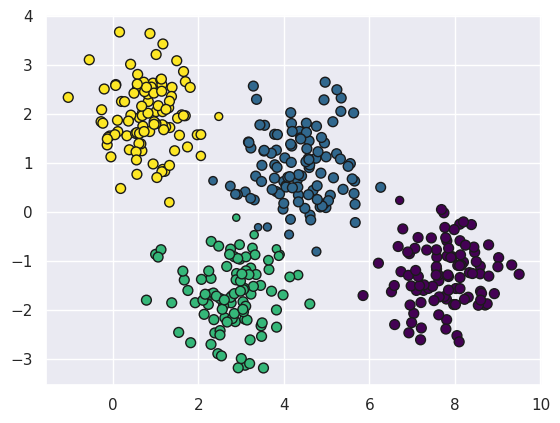

In [95]:
size = probs.max(1)/0.02
plt.scatter(X[:, 0], X[:, 1], c=labels, edgecolor='k', cmap='viridis', s=size);

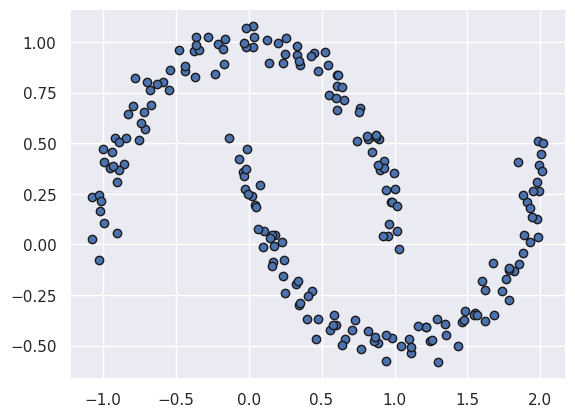

In [96]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1],edgecolor='k');

In [97]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()


    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2,edgecolor='k')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2,cmap='viridis',edgecolor='k')
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

<ipython-input-97-b1da820386a8>:16: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


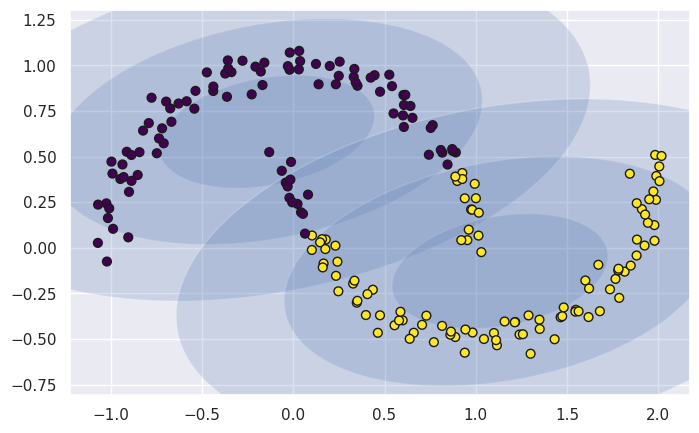

In [98]:
gmm2 = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
plt.figure(figsize=(8,5))
plot_gmm(gmm2, Xmoon)